In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.spatial import ConvexHull
from sklearn.preprocessing import StandardScaler

Deciding between CHROC and ROC:     
The convex hull function is not giving a covex result (possible to omit problem points by hand).    
But the bigger issue is that the best selected model for each type of model is NOT on the convex hull. So it's incredibly difficult to work with this argument. I don't think it's very worthwhile to try to make a model on the convex hull, then repeat all dropouts, learning curves etc. 

In [2]:
with open('../data_for_classifier/AGdata031119.pkl','rb') as f:
    AG_geneIDs, AGdata_outcome, AGdata_clean,X, y, X_train, X_test, y_train, y_test,AG_geneIDs_test, AG_geneIDs_train = pickle.load(f)


X = StandardScaler().fit_transform(AGdata_clean)

y = AGdata_outcome
X_test = X[(AG_geneIDs.Experiment=="T4_PEN")  | 
           (AG_geneIDs.Experiment=="T4_CIP") | (AG_geneIDs.Experiment=='19F_CIP'),:]
X_train = X[(AG_geneIDs.Experiment!="T4_PEN") & 
            (AG_geneIDs.Experiment!="T4_CIP") & (AG_geneIDs.Experiment!='19F_CIP') ,:]

y_test = y[(AG_geneIDs.Experiment=="T4_PEN")  | 
           (AG_geneIDs.Experiment=="T4_CIP") | (AG_geneIDs.Experiment=='19F_CIP') ]
y_train = y[(AG_geneIDs.Experiment!="T4_PEN") & 
            (AG_geneIDs.Experiment!="T4_CIP") & (AG_geneIDs.Experiment!='19F_CIP')]

AG_geneIDs_test = AG_geneIDs.loc[(AG_geneIDs.Experiment=="T4_PEN")  | 
                                 (AG_geneIDs.Experiment=="T4_CIP") | (AG_geneIDs.Experiment=='19F_CIP'),:]
AG_geneIDs_train = AG_geneIDs.loc[(AG_geneIDs.Experiment!="T4_PEN") & 
                                  (AG_geneIDs.Experiment!="T4_CIP") & (AG_geneIDs.Experiment!='19F_CIP'),:]

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
with open('../predictors/URAtrain/noDropout/predictors_withMOA_RIFtrain.pkl','rb') as f:
    DT_clf, LR_clf, SVM_clf, KNN_clf, RF_clf, MLP_clf = pickle.load(f)

In [4]:
Cons_test = pd.read_csv('../predictors/URAtrain/noDropout/Consensus_vote_test.csv')
Cons_train = pd.read_csv('../predictors/URAtrain/noDropout/Consensus_vote_train.csv')

In [5]:
DT_train_fpr, DT_train_tpr, _ = roc_curve(y_train, DT_clf.best_estimator_.predict_proba(X_train)[:,1])
DT_test_fpr, DT_test_tpr, _ = roc_curve(y_test, DT_clf.best_estimator_.predict_proba(X_test)[:,1])

DT_train_rocpoints = np.array([DT_train_fpr, DT_train_tpr])
DT_test_rocpoints = np.array([DT_test_fpr, DT_test_tpr])

DT_train_hull = ConvexHull(np.transpose(DT_train_rocpoints))
DT_test_hull = ConvexHull(np.transpose(DT_test_rocpoints))

DT_train_hull = np.sort(DT_train_hull.vertices)
DT_test_hull = np.sort(DT_test_hull.vertices)

In [6]:
LR_train_fpr, LR_train_tpr, _ = roc_curve(y_train, LR_clf.best_estimator_.predict_proba(X_train)[:,1])
LR_test_fpr, LR_test_tpr, _ = roc_curve(y_test, LR_clf.best_estimator_.predict_proba(X_test)[:,1])

LR_train_rocpoints = np.array([LR_train_fpr, LR_train_tpr])
LR_test_rocpoints = np.array([LR_test_fpr, LR_test_tpr])

LR_train_hull = ConvexHull(np.transpose(LR_train_rocpoints))
LR_test_hull = ConvexHull(np.transpose(LR_test_rocpoints))

LR_train_hull = np.sort(LR_train_hull.vertices)
LR_test_hull = np.sort(LR_test_hull.vertices)

In [7]:
SVM_train_fpr, SVM_train_tpr, _ = roc_curve(y_train, SVM_clf.best_estimator_.predict_proba(X_train)[:,1])
SVM_test_fpr, SVM_test_tpr, _ = roc_curve(y_test, SVM_clf.best_estimator_.predict_proba(X_test)[:,1])

SVM_train_rocpoints = np.array([SVM_train_fpr, SVM_train_tpr])
SVM_test_rocpoints = np.array([SVM_test_fpr, SVM_test_tpr])

SVM_train_hull = ConvexHull(np.transpose(SVM_train_rocpoints))
SVM_test_hull = ConvexHull(np.transpose(SVM_test_rocpoints))

SVM_train_hull = np.sort(SVM_train_hull.vertices)
SVM_test_hull = np.sort(SVM_test_hull.vertices)

In [8]:
KNN_train_fpr, KNN_train_tpr, _ = roc_curve(y_train, KNN_clf.best_estimator_.predict_proba(X_train)[:,1])
KNN_test_fpr, KNN_test_tpr, _ = roc_curve(y_test, KNN_clf.best_estimator_.predict_proba(X_test)[:,1])

KNN_train_rocpoints = np.array([KNN_train_fpr, KNN_train_tpr])
KNN_test_rocpoints = np.array([KNN_test_fpr, KNN_test_tpr])

KNN_train_hull = ConvexHull(np.transpose(KNN_train_rocpoints))
KNN_test_hull = ConvexHull(np.transpose(KNN_test_rocpoints))

KNN_train_hull = np.sort(KNN_train_hull.vertices)
KNN_test_hull = np.sort(KNN_test_hull.vertices)

In [9]:
RF_train_fpr, RF_train_tpr, _ = roc_curve(y_train, RF_clf.best_estimator_.predict_proba(X_train)[:,1])
RF_test_fpr, RF_test_tpr, _ = roc_curve(y_test, RF_clf.best_estimator_.predict_proba(X_test)[:,1])

RF_train_rocpoints = np.array([RF_train_fpr, RF_train_tpr])
RF_test_rocpoints = np.array([RF_test_fpr, RF_test_tpr])

RF_train_hull = ConvexHull(np.transpose(RF_train_rocpoints))
RF_test_hull = ConvexHull(np.transpose(RF_test_rocpoints))

RF_train_hull = np.sort(RF_train_hull.vertices)
RF_test_hull = np.sort(RF_test_hull.vertices)

In [50]:
MLP_train_fpr, MLP_train_tpr, _ = roc_curve(y_train, MLP_clf.best_estimator_.predict_proba(X_train)[:,1])
MLP_test_fpr, MLP_test_tpr, _ = roc_curve(y_test, MLP_clf.best_estimator_.predict_proba(X_test)[:,1])

MLP_train_rocpoints = np.array([MLP_train_fpr, MLP_train_tpr])
MLP_test_rocpoints = np.array([MLP_test_fpr, MLP_test_tpr])

MLP_train_hull = ConvexHull(np.transpose(MLP_train_rocpoints))
MLP_test_hull = ConvexHull(np.transpose(MLP_test_rocpoints))

MLP_train_hull = np.sort(MLP_train_hull.vertices)
MLP_test_hull = np.sort(MLP_test_hull.vertices)

In [102]:
CON_train_fpr, CON_train_tpr, _ = roc_curve(Cons_train['AG'], Cons_train['MajVoteProb'])
CON_test_fpr, CON_test_tpr, _ = roc_curve(Cons_test['AG'], Cons_test['MajVoteProb'])

CON_train_rocpoints = np.array([CON_train_fpr, CON_train_tpr])
CON_test_rocpoints = np.array([CON_test_fpr, CON_test_tpr])

CON_train_hull = ConvexHull(np.transpose(CON_train_rocpoints))
CON_test_hull = ConvexHull(np.transpose(CON_test_rocpoints))

CON_train_hull = np.sort(CON_train_hull.vertices)
CON_test_hull = np.sort(CON_test_hull.vertices)


In [47]:
DT_outcome_train = DT_clf.best_estimator_.predict(X_train)
DT_outcome_test = DT_clf.best_estimator_.predict(X_test)

DT_fpr_train = sum((DT_outcome_train==True) & (y_train==False))/len(y_train)
DT_tpr_train = sum((DT_outcome_train==True) & (y_train==True))/sum(y_train==True)

DT_fpr_test = sum((DT_outcome_test==True) & (y_test==False))/len(y_test)
DT_tpr_test = sum((DT_outcome_test==True) & (y_test==True))/sum(y_test==True)

In [48]:
LR_outcome_train = LR_clf.best_estimator_.predict(X_train)
LR_outcome_test = LR_clf.best_estimator_.predict(X_test)

LR_fpr_train = sum((LR_outcome_train==True) & (y_train==False))/len(y_train)
LR_tpr_train = sum((LR_outcome_train==True) & (y_train==True))/sum(y_train==True)

LR_fpr_test = sum((LR_outcome_test==True) & (y_test==False))/len(y_test)
LR_tpr_test = sum((LR_outcome_test==True) & (y_test==True))/sum(y_test==True)

In [79]:
SVM_outcome_train = SVM_clf.best_estimator_.predict(X_train)
SVM_outcome_test = SVM_clf.best_estimator_.predict(X_test)

SVM_fpr_train = sum((SVM_outcome_train==True) & (y_train==False))/len(y_train)
SVM_tpr_train = sum((SVM_outcome_train==True) & (y_train==True))/sum(y_train==True)

SVM_fpr_test = sum((SVM_outcome_test==True) & (y_test==False))/len(y_test)
SVM_tpr_test = sum((SVM_outcome_test==True) & (y_test==True))/sum(y_test==True)

In [80]:
KNN_outcome_train = KNN_clf.best_estimator_.predict(X_train)
KNN_outcome_test = KNN_clf.best_estimator_.predict(X_test)

KNN_fpr_train = sum((KNN_outcome_train==True) & (y_train==False))/len(y_train)
KNN_tpr_train = sum((KNN_outcome_train==True) & (y_train==True))/sum(y_train==True)

KNN_fpr_test = sum((KNN_outcome_test==True) & (y_test==False))/len(y_test)
KNN_tpr_test = sum((KNN_outcome_test==True) & (y_test==True))/sum(y_test==True)

In [81]:
RF_outcome_train = RF_clf.best_estimator_.predict(X_train)
RF_outcome_test = RF_clf.best_estimator_.predict(X_test)

RF_fpr_train = sum((RF_outcome_train==True) & (y_train==False))/len(y_train)
RF_tpr_train = sum((RF_outcome_train==True) & (y_train==True))/sum(y_train==True)

RF_fpr_test = sum((RF_outcome_test==True) & (y_test==False))/len(y_test)
RF_tpr_test = sum((RF_outcome_test==True) & (y_test==True))/sum(y_test==True)

In [82]:
MLP_outcome_train = MLP_clf.best_estimator_.predict(X_train)
MLP_outcome_test = MLP_clf.best_estimator_.predict(X_test)

MLP_fpr_train = sum((MLP_outcome_train==True) & (y_train==False))/len(y_train)
MLP_tpr_train = sum((MLP_outcome_train==True) & (y_train==True))/sum(y_train==True)

MLP_fpr_test = sum((MLP_outcome_test==True) & (y_test==False))/len(y_test)
MLP_tpr_test = sum((MLP_outcome_test==True) & (y_test==True))/sum(y_test==True)

In [103]:
CON_outcome_train = Cons_train['MajVoteProb']
CON_outcome_test = Cons_test['MajVoteProb']

CON_fpr_train = sum((CON_outcome_train > 0.5) & (Cons_train['AG']==False))/len(y_train)
CON_tpr_train = sum((CON_outcome_train > 0.5) & (Cons_train['AG']==True))/sum(y_train==True)

CON_fpr_test = sum((CON_outcome_test > 0.5) & (Cons_test['AG']==False))/len(y_test)
CON_tpr_test = sum((CON_outcome_test > 0.5) & (Cons_test['AG']==True))/sum(y_test==True)

In [99]:
len(Cons_test['AG']) , len(y_test)

(5736, 5736)

In [100]:
sum((CON_outcome_test > 0.5) & (Cons_test['AG']==False))

4

In [101]:
4/5736

0.000697350069735007

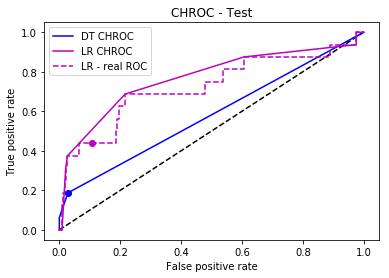

In [63]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_test_fpr[DT_test_hull], DT_test_tpr[DT_test_hull],'b', label='DT CHROC')
plt.plot(LR_test_fpr[LR_test_hull], LR_test_tpr[LR_test_hull],'m', label='LR CHROC')

plt.plot(LR_test_fpr, LR_test_tpr,'m--', label='LR - real ROC')
#plt.plot(SVM_test_fpr[SVM_test_hull], SVM_test_tpr[SVM_test_hull], label='SVM')
#plt.plot(KNN_test_fpr[KNN_test_hull], KNN_test_tpr[KNN_test_hull], label='KNN')
#plt.plot(RF_test_fpr[RF_test_hull], RF_test_tpr[RF_test_hull], label='RF')
#plt.plot(MLP_test_fpr[MLP_test_hull], MLP_test_tpr[MLP_test_hull], label='MLP')
#plt.plot(CON_test_fpr[CON_test_hull], CON_test_tpr[CON_test_hull],'k' ,label='Consensus')

plt.plot(DT_fpr_test, DT_tpr_test, 'bo')
plt.plot(LR_fpr_test, LR_tpr_test,'mo')


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('CHROC - Test')

#plt.xlim(0, 0.01)
#plt.ylim(0,0.5)

fig1 = plt.gcf()
plt.show()
#fig1.savefig('../predictors/noDropout/CHROC_Test.svg')

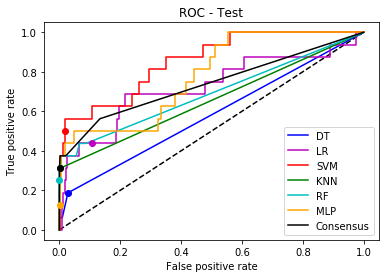

In [104]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_test_fpr, DT_test_tpr,'b', label='DT')
plt.plot(LR_test_fpr, LR_test_tpr,'m', label='LR')
plt.plot(SVM_test_fpr, SVM_test_tpr,'r', label='SVM')
plt.plot(KNN_test_fpr, KNN_test_tpr,'g', label='KNN')
plt.plot(RF_test_fpr, RF_test_tpr,'c', label='RF')
plt.plot(MLP_test_fpr, MLP_test_tpr,'orange', label='MLP')
plt.plot(CON_test_fpr, CON_test_tpr,'k' ,label='Consensus')

plt.plot(DT_fpr_test, DT_tpr_test, 'bo')
plt.plot(LR_fpr_test, LR_tpr_test,'mo')
plt.plot(SVM_fpr_test, SVM_tpr_test, 'ro')
plt.plot(KNN_fpr_test, KNN_tpr_test,'go')
plt.plot(RF_fpr_test, RF_tpr_test, 'co')
plt.plot(MLP_fpr_test, MLP_tpr_test,'orange', marker='o')
plt.plot(CON_fpr_test, CON_tpr_test, 'ko')


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('ROC - Test')

#plt.xlim(0, 0.01)
#plt.ylim(0,0.5)

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtrain/noDropout/ROC_test_bestmodel.svg')

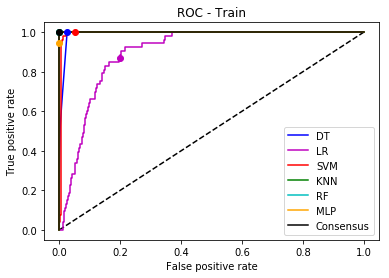

In [106]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_train_fpr, DT_train_tpr,'b', label='DT')
plt.plot(LR_train_fpr, LR_train_tpr,'m', label='LR')
plt.plot(SVM_train_fpr, SVM_train_tpr,'r', label='SVM')
plt.plot(KNN_train_fpr, KNN_train_tpr,'g', label='KNN')
plt.plot(RF_train_fpr, RF_train_tpr,'c', label='RF')
plt.plot(MLP_train_fpr, MLP_train_tpr,'orange', label='MLP')
plt.plot(CON_train_fpr, CON_train_tpr,'k' ,label='Consensus')

plt.plot(DT_fpr_train, DT_tpr_train, 'bo')
plt.plot(LR_fpr_train, LR_tpr_train,'mo')
plt.plot(SVM_fpr_train, SVM_tpr_train, 'ro')
plt.plot(KNN_fpr_train, KNN_tpr_train,'go')
plt.plot(RF_fpr_train, RF_tpr_train, 'co')
plt.plot(MLP_fpr_train, MLP_tpr_train,'orange', marker='o')
plt.plot(CON_fpr_train, CON_tpr_train, 'ko')


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('ROC - Train')

#plt.xlim(0, 0.01)
#plt.ylim(0,0.5)

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtrain/noDropout/ROC_train_bestmodel.svg')

In [98]:
CON_fpr_test, CON_tpr_test

(0.000697350069735007, 0.3125)

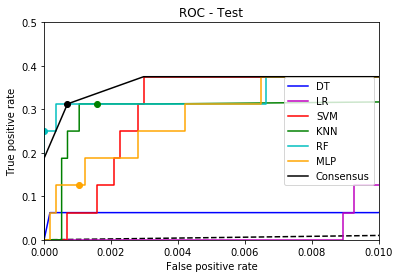

In [105]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_test_fpr, DT_test_tpr,'b', label='DT')
plt.plot(LR_test_fpr, LR_test_tpr,'m', label='LR')
plt.plot(SVM_test_fpr, SVM_test_tpr,'r', label='SVM')
plt.plot(KNN_test_fpr, KNN_test_tpr,'g', label='KNN')
plt.plot(RF_test_fpr, RF_test_tpr,'c', label='RF')
plt.plot(MLP_test_fpr, MLP_test_tpr,'orange', label='MLP')
plt.plot(CON_test_fpr, CON_test_tpr,'k' ,label='Consensus')

plt.plot(DT_fpr_test, DT_tpr_test, 'bo')
plt.plot(LR_fpr_test, LR_tpr_test,'mo')
plt.plot(SVM_fpr_test, SVM_tpr_test, 'ro')
plt.plot(KNN_fpr_test, KNN_tpr_test,'go')
plt.plot(RF_fpr_test, RF_tpr_test, 'co')
plt.plot(MLP_fpr_test, MLP_tpr_test,'orange', marker='o')
plt.plot(CON_fpr_test, CON_tpr_test, 'ko')


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('ROC - Test')

plt.xlim(0, 0.01)
plt.ylim(0,0.5)

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtrain/noDropout/ROC_test_bestmodel_zoom.svg')

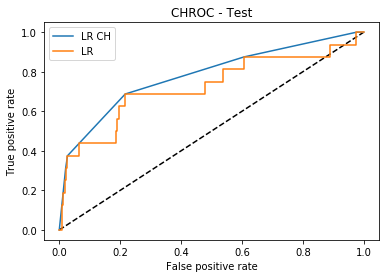

In [61]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(DT_test_fpr[DT_test_hull], DT_test_tpr[DT_test_hull], label='DT')
plt.plot(LR_test_fpr[LR_test_hull[[0,2,3,4,5,7,8]]], LR_test_tpr[LR_test_hull[[0,2,3,4,5,7,8]]], label='LR CH')
plt.plot(LR_test_fpr, LR_test_tpr, label='LR')

plt.plot(DT_fpr_test, DT_tpr_test)
plt.plot(LR_fpr_test, LR_tpr_test)


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('CHROC - Test')

#plt.xlim(0, 0.01)
#plt.ylim(0,0.5)

fig1 = plt.gcf()
plt.show()

In [60]:
LR_test_hull

array([ 0,  2, 11, 13, 31, 37, 40, 41, 42], dtype=int32)

In [34]:
ConvexHull(np.transpose(LR_test_rocpoints)).vertices

array([42, 41, 37, 31, 13, 11,  0,  2, 40], dtype=int32)

In [32]:
np.transpose(LR_test_rocpoints)

array([[0.00000000e+00, 0.00000000e+00],
       [1.74825175e-04, 0.00000000e+00],
       [8.91608392e-03, 0.00000000e+00],
       [8.91608392e-03, 6.25000000e-02],
       [9.26573427e-03, 6.25000000e-02],
       [9.26573427e-03, 1.25000000e-01],
       [1.32867133e-02, 1.25000000e-01],
       [1.32867133e-02, 1.87500000e-01],
       [2.01048951e-02, 1.87500000e-01],
       [2.01048951e-02, 2.50000000e-01],
       [2.09790210e-02, 2.50000000e-01],
       [2.09790210e-02, 3.12500000e-01],
       [2.69230769e-02, 3.12500000e-01],
       [2.69230769e-02, 3.75000000e-01],
       [5.66433566e-02, 3.75000000e-01],
       [5.69930070e-02, 3.75000000e-01],
       [6.60839161e-02, 3.75000000e-01],
       [6.60839161e-02, 4.37500000e-01],
       [8.11188811e-02, 4.37500000e-01],
       [8.14685315e-02, 4.37500000e-01],
       [9.73776224e-02, 4.37500000e-01],
       [9.77272727e-02, 4.37500000e-01],
       [1.27622378e-01, 4.37500000e-01],
       [1.27972028e-01, 4.37500000e-01],
       [1.875874

======================
### Learning curves - with shuffle

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import VotingClassifier

In [108]:
DT_for_lc = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
LR_for_lc = LogisticRegression(C=37.27593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
KNN_for_lc = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')
SVM_for_lc = SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
RF_for_lc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
MLP_for_lc = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [118]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 8),
                       random_state = 42, scorer = "accuracy"):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
                                                            random_state = random_state, shuffle = True,
                                                            scoring = scorer)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [117]:
skf = StratifiedKFold(n_splits=10, random_state=90)

from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

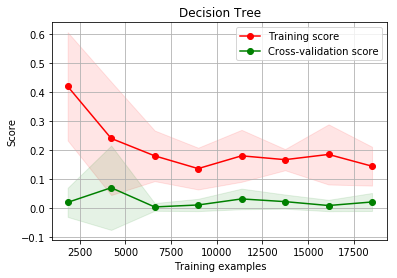

In [122]:
plot_learning_curve(DT_for_lc, "Decision Tree", X_train, y_train, cv = skf.split(X_train, y_train),
                   scorer = kappa_scorer)
fig1 = plt.gcf()
fig1.savefig('../predictors/URAtrain/noDropout/DT_LC_shuffle_kappa.svg')

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


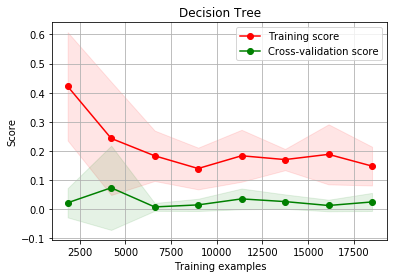

In [123]:
plot_learning_curve(DT_for_lc, "Decision Tree", X_train, y_train, cv = skf.split(X_train, y_train),
                   scorer = "f1")
fig1 = plt.gcf()
fig1.savefig('../predictors/URAtrain/noDropout/DT_LC_shuffle_F1.svg')

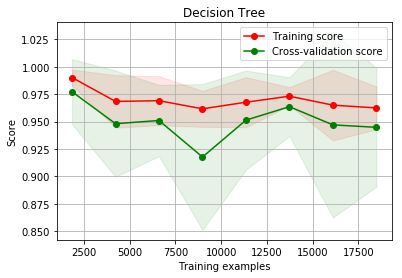

In [125]:
plot_learning_curve(DT_for_lc, "Decision Tree", X_train, y_train, cv = skf.split(X_train, y_train),
                   scorer = "accuracy")
fig1 = plt.gcf()
fig1.savefig('../predictors/URAtrain/noDropout/DT_LC_shuffle_accuracy.svg')

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conver

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conver

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conver

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 

KeyboardInterrupt: 

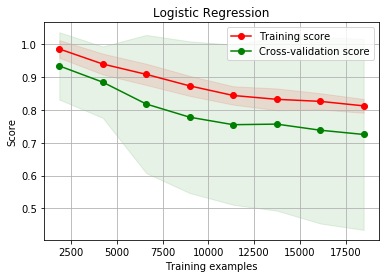

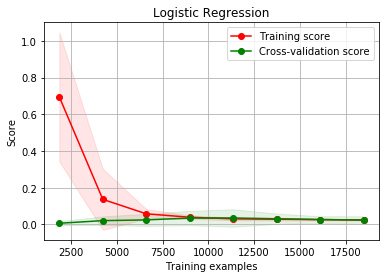

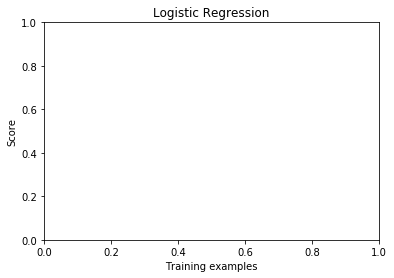

In [126]:
plot_learning_curve(LR_for_lc, "Logistic Regression", X_train, y_train, cv = skf.split(X_train, y_train),
                   scorer = "accuracy")
fig1 = plt.gcf()
fig1.savefig('../predictors/URAtrain/noDropout/LR_LC_shuffle_accuracy.svg')

plot_learning_curve(LR_for_lc, "Logistic Regression", X_train, y_train, cv = skf.split(X_train, y_train),
                   scorer = "f1")
fig1 = plt.gcf()
fig1.savefig('../predictors/URAtrain/noDropout/LR_LC_shuffle_F1.svg')

plot_learning_curve(LR_for_lc, "Logistic Regression", X_train, y_train, cv = skf.split(X_train, y_train),
                   scorer = kappa_scorer)
fig1 = plt.gcf()
fig1.savefig('../predictors/URAtrain/noDropout/LR_LC_shuffle_kappa.svg')